# Full Processing of UVJ Data for the ZFourge Survey
This script is used to perform the processing of data generated using the template extraction script. This script is used to investigate how the UVJ positions of ZFOURGE change with an increasing amount of contamination from the AGN. In addition to this, this script will be used to choose a selection of IDs across each survey which will the be used to generate some more plots for the final paper.

In [146]:
# Import all relevant libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
# We would like to read in the fits files that we are exploring in this project
# This is related to the data that we are using
# we will be looking at all fields so it will be easier to read in all required fits files, and all recalculated IDs and combine these 
# into three master dataframes.
# From here we will be able to check the best values for each and eventually select some reliabile samples

zfourge_path = 'datasets/zfourge/'

# Read in ZFourge Data in each field

#CDFS, COSMOS, UDS
cdfs_df = read_zfourge_data('CDFS', zfourge_path)
cosmos_df = read_zfourge_data('COSMOS', zfourge_path)
uds_df = read_zfourge_data('UDS', zfourge_path)


c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\OneDrive\Documents\GitHub\HonoursResearchProject\carf.py:1040: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, 'mag_V'] = flux_to_mag(df['V'])
c:\Users\Titan\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Titan\OneDrive\Documents\GitHub\HonoursResearchProject\carf.p

In [148]:
# Read in all the recalculated UVJ colours for the id's
# as a dataframe
cdfs_recalcUVJids = pd.read_csv('datasets/zfourge/CDFS_RecalculatedUVJids_full.csv')
cosomos_recalcUVJids = pd.read_csv('datasets/zfourge/COSMOS_RecalculatedUVJids_full.csv')
uds_recalcUVJids = pd.read_csv('datasets/zfourge/UDS_RecalculatedUVJids_full.csv')


# Rename id's to lowercase
cdfs_recalcUVJids = cdfs_recalcUVJids.rename(columns={'ID':'id'})
cosomos_recalcUVJids = cosomos_recalcUVJids.rename(columns={'ID':'id'})
uds_recalcUVJids = uds_recalcUVJids.rename(columns={'ID':'id'})


In [149]:
# Now that we have both the inital dataframe + the recalculated UVJ id's we can merge these together
# after this we should merge all of our dataframes together to create a master dataframe
# This will allow us to easily access all of the data that we need
#cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
#cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
#uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')

In [150]:
cdfs_df

,recno,id,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,lmass,mag_U,mag_V,mag_J,e_mag_U,e_mag_V,e_mag_J,UV,VJ,field
0,1,CDFS_1,4078.527,203.090,53.100105,-27.966728,19,5484.0,73.39300,0.26373,...,11.56,22.128170,20.068596,18.985397,24.137389,23.296963,23.137208,2.059573,1.083200,CDFS
1,2,CDFS_2,6292.975,55.927,52.995632,-27.972803,2,315.0,9.56143,0.25146,...,9.05,24.007524,23.108191,22.593727,27.869360,28.547027,27.633753,0.899333,0.514464,CDFS
2,3,CDFS_3,1791.772,51.199,53.207989,-27.973034,2,375.0,10.82121,0.26373,...,10.42,24.823751,23.283146,21.851087,27.891747,26.678404,26.468798,1.540605,1.432059,CDFS
3,4,CDFS_4,4181.315,176.410,53.095257,-27.967840,3,1060.0,76.36145,0.26373,...,11.83,19.589616,17.675879,18.227869,inf,inf,inf,1.913737,-0.551990,CDFS
4,5,CDFS_5,5997.950,48.860,53.009548,-27.973110,0,219.0,26.52806,0.25146,...,10.51,21.702808,21.837879,22.405160,27.903116,28.089700,28.370834,-0.135071,-0.567281,CDFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906,30907,CDFS_30907,4150.499,7668.344,53.096783,-27.655676,0,124.0,3.93497,0.23131,...,10.08,24.231164,23.969626,23.632093,27.952808,25.379935,28.327743,0.261538,0.337533,CDFS
30907,30908,CDFS_30908,3050.447,7621.582,53.148533,-27.657625,0,195.0,10.53820,0.20227,...,10.56,26.596601,24.346522,22.435589,inf,inf,inf,2.250080,1.910933,CDFS
30908,30909,CDFS_30909,4385.049,7547.789,53.085751,-27.660698,0,18.0,0.74274,0.22289,...,9.60,25.601854,25.571331,24.955310,30.083650,30.589700,31.567715,0.030524,0.616021,CDFS
30909,30910,CDFS_30910,3221.845,7527.777,53.140469,-27.661535,0,36.0,0.95773,0.19657,...,9.46,26.265728,25.488033,25.269030,29.331073,30.001668,30.857724,0.777694,0.219003,CDFS


In [151]:
cdfs_recalcUVJids

,id,UV_0,VJ_0,UV_10,VJ_10,UV_20,VJ_20,UV_30,VJ_30,UV_40,...,UV_60,VJ_60,UV_70,VJ_70,UV_80,VJ_80,UV_90,VJ_90,UV_100,VJ_100
0,CDFS_10002,0.665009,0.304734,0.655083,0.311125,0.645617,0.317238,0.636579,0.323093,0.627940,...,0.611758,0.339259,0.604169,0.344227,0.596888,0.349006,0.589896,0.353605,0.583175,0.358034
1,CDFS_10003,1.032610,-0.302286,1.012378,-0.278092,0.993195,-0.255233,0.974978,-0.233596,0.957655,...,0.925428,-0.175078,0.910411,-0.157437,0.896059,-0.140617,0.882328,-0.124559,0.869176,-0.109211
2,CDFS_10011,1.398111,0.642368,1.370677,0.641760,1.344622,0.641167,1.319836,0.640590,1.296223,...,1.252180,0.638944,1.231602,0.638422,1.211898,0.637913,1.193012,0.637416,1.174890,0.636930
3,CDFS_10019,0.784209,0.479195,0.769046,0.481857,0.754723,0.484400,0.741171,0.486832,0.728327,...,0.704551,0.493528,0.693525,0.495581,0.683019,0.497552,0.672996,0.499448,0.663424,0.501271
4,CDFS_10020,0.942698,-0.037511,0.923542,-0.020788,0.905436,-0.004948,0.888294,0.010080,0.872038,...,0.841920,0.050878,0.827940,0.063218,0.814611,0.075001,0.801887,0.086265,0.789727,0.097043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7313,CDFS_9983,0.262188,0.789646,0.261482,0.783638,0.260822,0.777991,0.260204,0.772674,0.259624,...,0.258565,0.758435,0.258081,0.754185,0.257623,0.750151,0.257189,0.746318,0.256779,0.742670
7314,CDFS_9988,0.364086,0.138944,0.360367,0.155103,0.356867,0.170144,0.353568,0.184179,0.350451,...,0.344712,0.221179,0.342063,0.232063,0.339546,0.242327,0.337153,0.252022,0.334873,0.261196
7315,CDFS_9992,0.566499,0.465811,0.557076,0.469227,0.548188,0.472466,0.539790,0.475542,0.531842,...,0.517158,0.483906,0.510362,0.486440,0.503895,0.488860,0.497732,0.491174,0.491854,0.493390
7316,CDFS_9994,0.249918,0.071604,0.249657,0.091980,0.249411,0.110805,0.249179,0.128252,0.248961,...,0.248559,0.173703,0.248373,0.186927,0.248197,0.199337,0.248030,0.211008,0.247870,0.222004


In [152]:
# Merge the recalculated UVJ id's with the original dataframes
cdfs_df = pd.merge(cdfs_df, cdfs_recalcUVJids, on='id')
cosmos_df = pd.merge(cosmos_df, cosomos_recalcUVJids, on='id')
uds_df = pd.merge(uds_df, uds_recalcUVJids, on='id')


In [153]:
# See if this worked
# We are now able to put all the dataframes into one dataframe
# This will allow us to easily access all the data that we need

# Making one dataframe
frames = [cdfs_df, cosmos_df, uds_df]
zfourge_df = pd.concat(frames)



In [154]:
# Before we continue we must look to see the distribution of values that have moved based on calculations
# We will look at the recalculated UVJ values and see how many have changed with the new method
# Removing significant changes for the time being 

zfourge_df['vector_magnitude_original'] = np.sqrt(zfourge_df['UV']**2 + zfourge_df['VJ']**2)
zfourge_df['vector_magnitude_recalculated'] = np.sqrt(zfourge_df['UV_0']**2 + zfourge_df['VJ_0']**2)

# now we can calculate the difference between the two
zfourge_df['vector_magnitude_difference'] = abs(zfourge_df['vector_magnitude_original'] - zfourge_df['vector_magnitude_recalculated'])


C:\Users\Titan\AppData\Local\Temp\ipykernel_8860\3953636120.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  zfourge_df['vector_magnitude_original'] = np.sqrt(zfourge_df['UV']**2 + zfourge_df['VJ']**2)
C:\Users\Titan\AppData\Local\Temp\ipykernel_8860\3953636120.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  zfourge_df['vector_magnitude_recalculated'] = np.sqrt(zfourge_df['UV_0']**2 + zfourge_df['VJ_0']**2)
C:\Users\Titan\AppData\Local\Temp\ipykernel_8860\3953636120.py:9: PerformanceWarning: DataFrame is highly fragmented

In [155]:
# Use seaborn to plot the histograms
import seaborn as sns



In [156]:
zfourge_df[zfourge_df['field'] == 'CDFS']['vector_magnitude_difference']

0       0.091944
1       0.099199
2       0.102101
3       0.103142
4       0.061568
          ...   
7313    0.041875
7314    0.109897
7315    0.213203
7316    0.126243
7317    0.144715
Name: vector_magnitude_difference, Length: 7318, dtype: float64

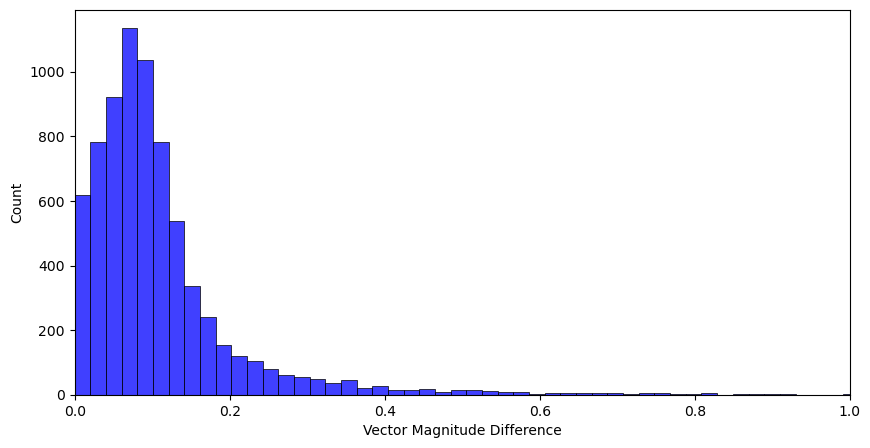

In [157]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df[zfourge_df['field'] == 'CDFS']['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_xlim([0, 1])
plt.show()


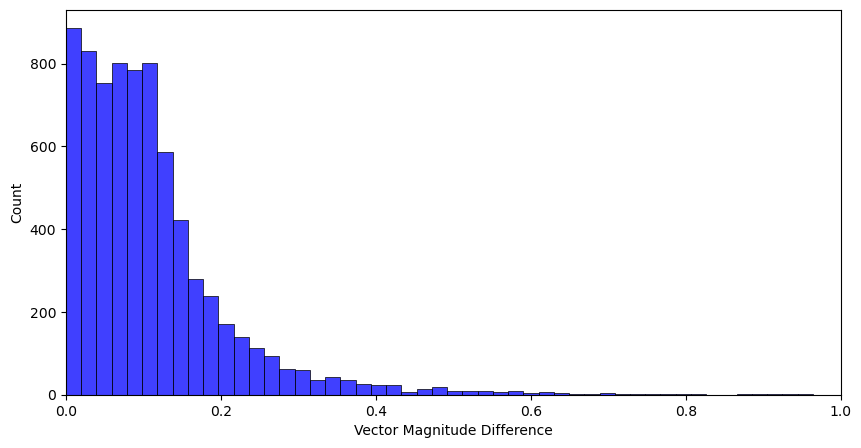

In [158]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df[zfourge_df['field'] == 'COSMOS']['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_xlim([0, 1])
plt.show()

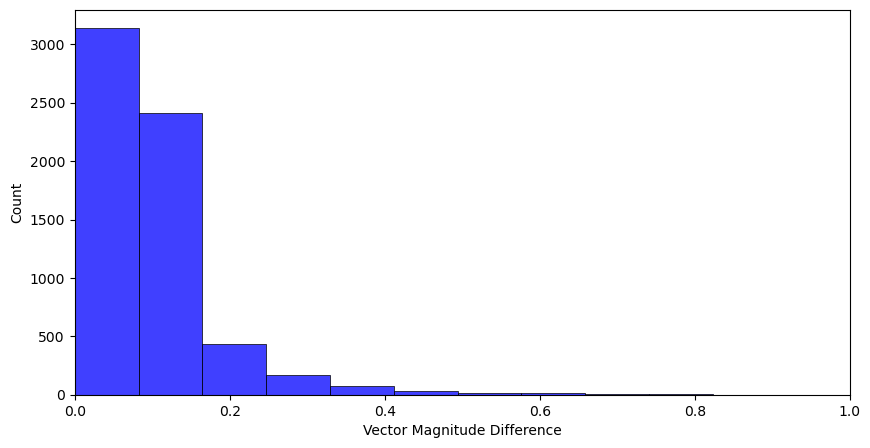

In [159]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(zfourge_df[zfourge_df['field'] == 'UDS']['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_xlim([0, 1])
plt.show()

In [160]:
# We would like to drop all values that have a vector magnitude difference greater than 0.2

# Dropping these values
#zforuge_df = zfourge_df[zfourge_df['vector_magnitude_difference'] < 0.2]




In [161]:
# Plot the UVJ diagram

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the CDFS field')
    plt.legend()
    plt.show()

In [162]:
# Plot the UVJ diagram

def plot_uvj_nocategorise(df, x, y):
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)


    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))



    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later



    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


    #print(non_quiescent_points[0][0])

    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the CDFS field')
    plt.legend()
    plt.show()

In [163]:
# Now that we have all the data in one dataframe we can start to look at the data
# Importantly we would like to plot how different the data is 

# Plotting a master UVJ diagram
def categorise_uvj(df, x, y, alpha=None):
    #x = df['mag_V'] - df['mag_J'] # VJ Colours 
    #y = df['mag_U'] - df['mag_V'] # UV Colours

    # Plot the UVJ diagram
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)
    
    
    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))
    
    
    
    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)
    
    

    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later
    

    # Mark dusty, and star-forming galaxies
    if alpha == None:
        df.loc[dusty_condition, f'GalaxyType'] = 2
        df.loc[star_forming_condition, f'GalaxyType'] = 1
        selected_ids = selected_df['id']
        df.loc[df['id'].isin(selected_ids), f'GalaxyType'] = 0
    else:     
        df.loc[dusty_condition, f'GalaxyType_{int(alpha*100)}'] = 2
        df.loc[star_forming_condition, f'GalaxyType_{int(alpha*100)}'] = 1
        selected_ids = selected_df['id']
        df.loc[df['id'].isin(selected_ids), f'GalaxyType_{int(alpha*100)}'] = 0

    #print(selected_df)
    #print(unselected_df)
    
    # Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
    #print(selected_df)
     # This is what makes the selection happen
    
    
    
    # Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
    #unselected_ids = unselected_df['id']
    
    
    
    
    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]
    
    
    #print(non_quiescent_points[0][0])
    
    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the CDFS field')
    plt.legend()
    plt.show()
    return df

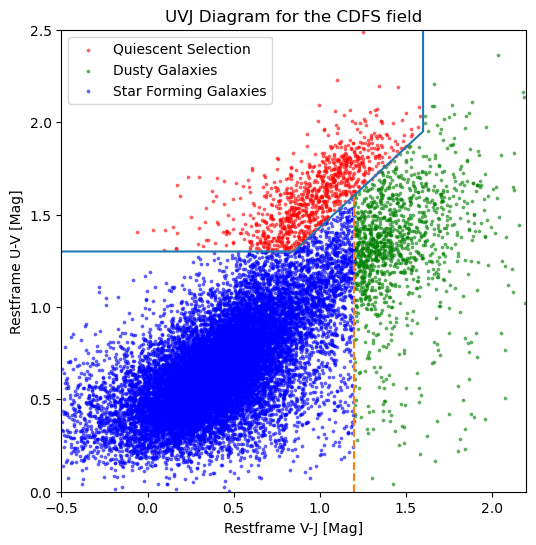

In [164]:
zfourge_df = categorise_uvj(zfourge_df, zfourge_df['VJ'], zfourge_df['UV'])

In [165]:
# For each value of alpha, plot the UVJ diagram
alpha_list = np.linspace(0, 1, 11)

In [166]:
alpha_list

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

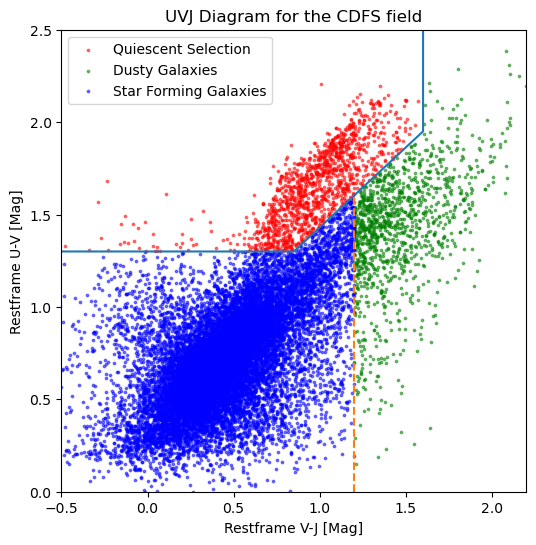

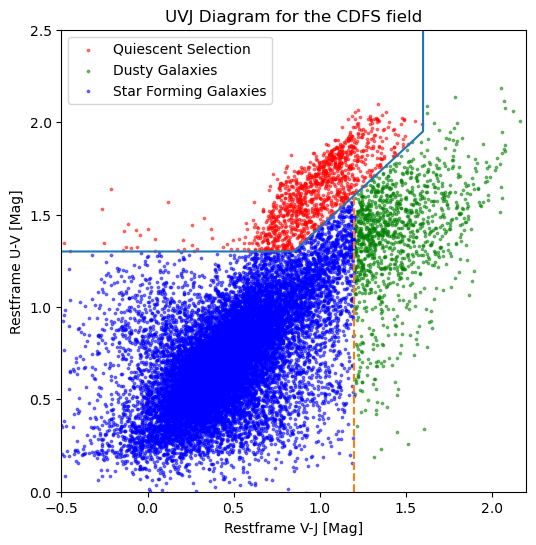

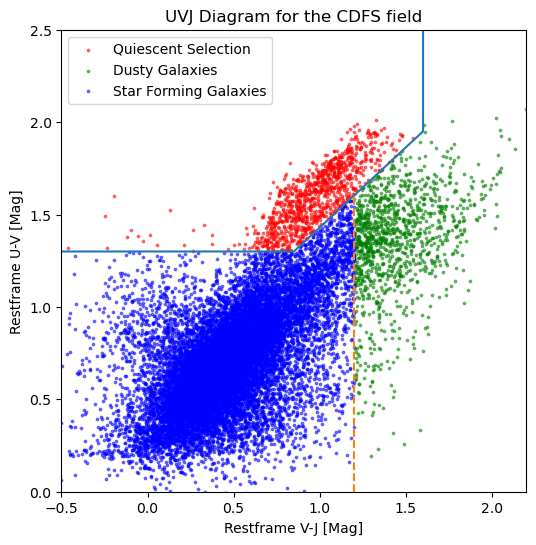

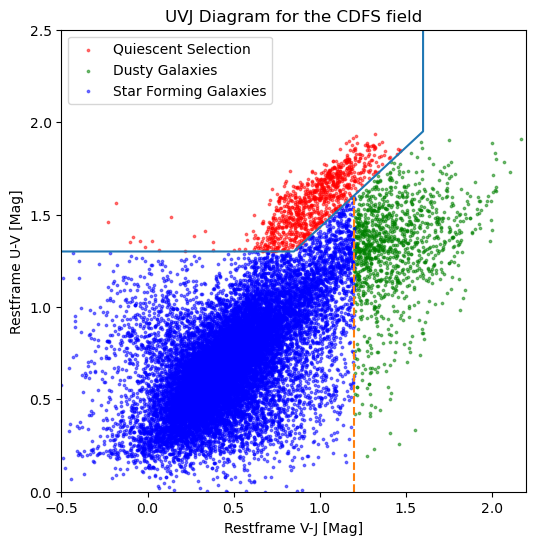

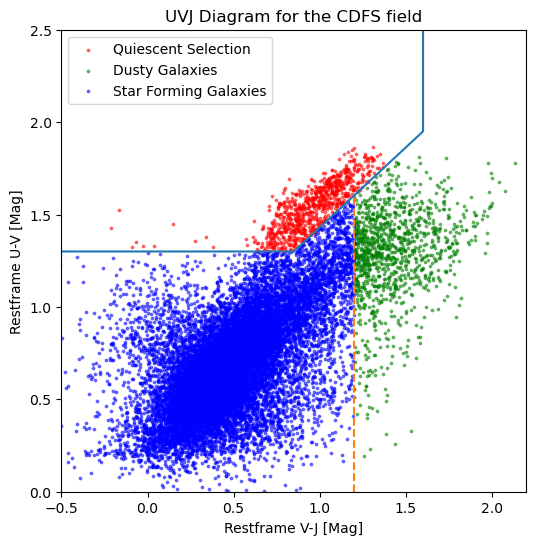

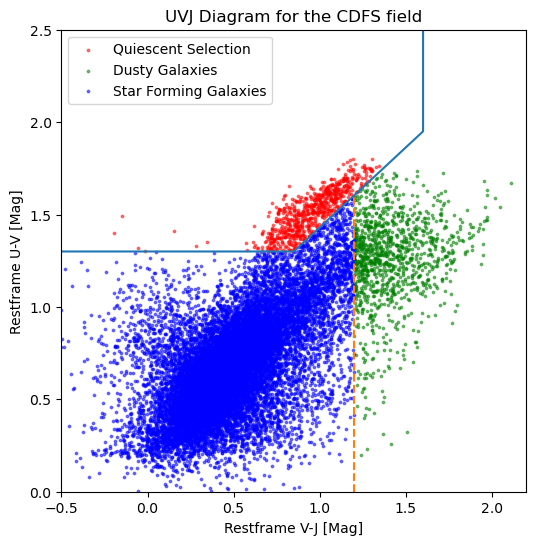

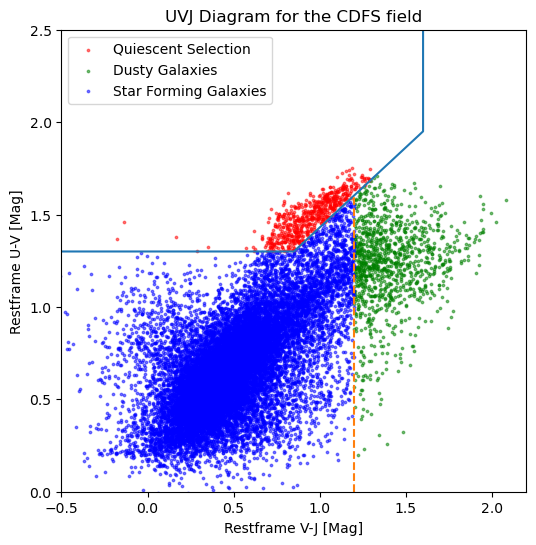

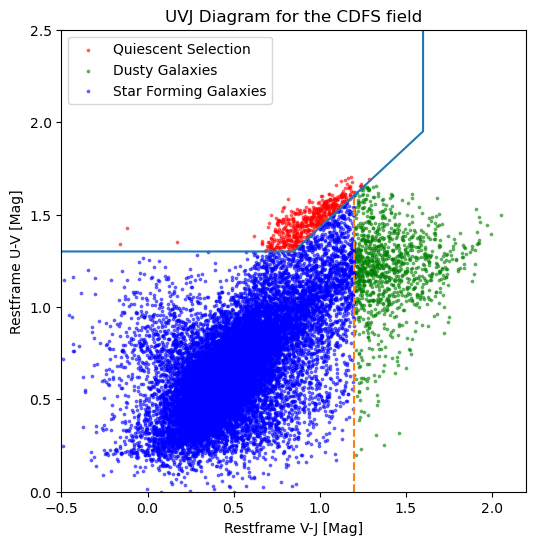

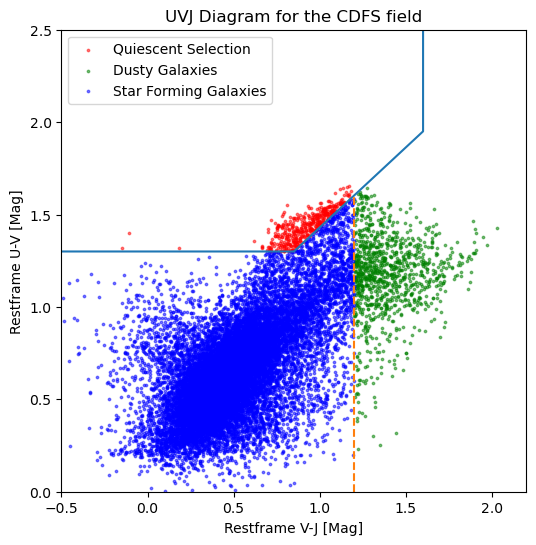

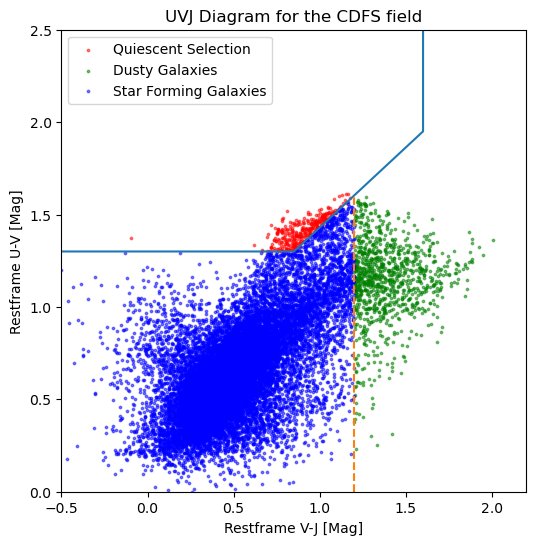

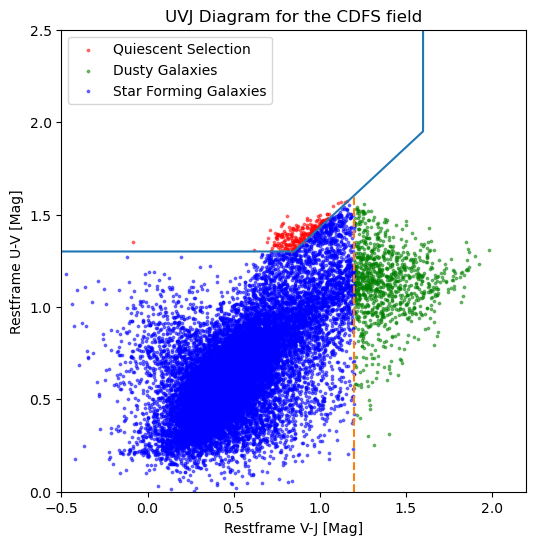

In [167]:
for alpha in alpha_list:
    zfourge_df = categorise_uvj(zfourge_df, zfourge_df['VJ_{}'.format(int(alpha*100))], zfourge_df['UV_{}'.format(int(alpha*100))], alpha)

In [168]:
# Now we will look at the best 20 sources of each region, in each field.
# that did not move much based on their vector magnitude difference

# For each field, and each region, select the 20 sources with the lowest magnitude difference
n = 300
# CDFS
# Quiescent
cdfs_quiescent = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType'] == 0)].sort_values(by='vector_magnitude_difference').head(n)
# Dusty
cdfs_dusty = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType'] == 2)].sort_values(by='vector_magnitude_difference').head(n)
# Star Forming
cdfs_star_forming = zfourge_df[(zfourge_df['field'] == 'CDFS') & (zfourge_df['GalaxyType'] == 1)].sort_values(by='vector_magnitude_difference').head(n)

# COSMOS
# Quiescent
cosmos_quiescent = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType'] == 0)].sort_values(by='vector_magnitude_difference').head(n)
# Dusty
cosmos_dusty = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType'] == 2)].sort_values(by='vector_magnitude_difference').head(n)
# Star Forming
cosmos_star_forming = zfourge_df[(zfourge_df['field'] == 'COSMOS') & (zfourge_df['GalaxyType'] == 1)].sort_values(by='vector_magnitude_difference').head(n)

# UDS
# Quiescent
uds_quiescent = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType'] == 0)].sort_values(by='vector_magnitude_difference').head(n)
# Dusty
uds_dusty = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType'] == 2)].sort_values(by='vector_magnitude_difference').head(n)
# Star Forming
uds_star_forming = zfourge_df[(zfourge_df['field'] == 'UDS') & (zfourge_df['GalaxyType'] == 1)].sort_values(by='vector_magnitude_difference').head(n)


# Combining these all back into a more refined dataframe,

frames = [cdfs_quiescent, cdfs_dusty, cdfs_star_forming, cosmos_quiescent, cosmos_dusty, cosmos_star_forming, uds_quiescent, uds_dusty, uds_star_forming]
best_sources_df = pd.concat(frames)

best_sources_df = zforuge_df


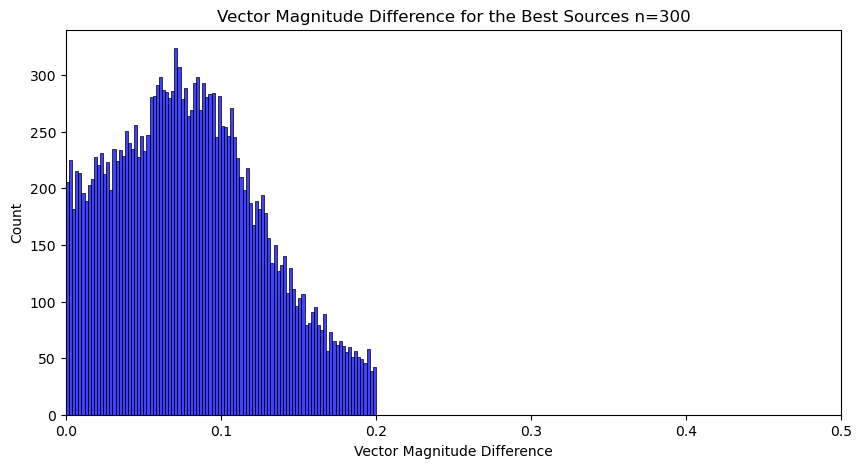

In [169]:
# Checking out the vector magnitude histrogram for the best sources
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
sns.histplot(best_sources_df['vector_magnitude_difference'], bins=100, color='blue', ax=ax)
ax.set_xlabel('Vector Magnitude Difference')
ax.set_ylabel('Count')
ax.set_title('Vector Magnitude Difference for the Best Sources n={}'.format(n))
ax.set_xlim([0, 0.5])
plt.show()


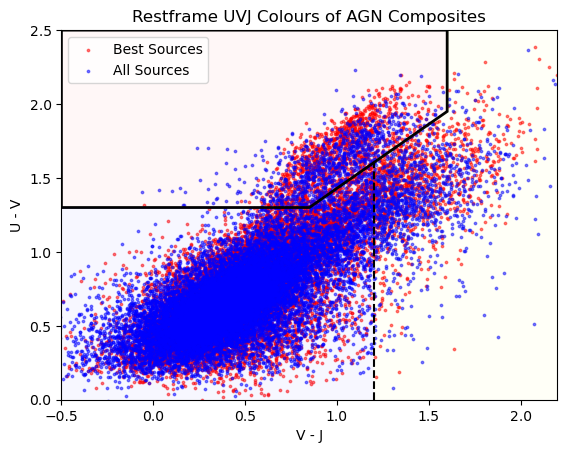

In [170]:
# Now we have a selection of sources that can be considered good sources for the UVJ diagram

# Plot these sources on a UVJ diagram, all of them 

plt.scatter(best_sources_df['VJ_0'], best_sources_df['UV_0'], c='r', s=3, alpha=0.5, label='Best Sources')

plt.scatter(best_sources_df['VJ'], best_sources_df['UV'], c='b', s=3, alpha=0.5, label='All Sources')
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()



In [ ]:
# So there is a slight shift but it isn't drastically important for this as we are looking at the statistics behind what is actualy happening. We not however that in terms of what is generally tending to be miscalculated is the middle section of the UVJ diagram
# we see that this is one of the thinner parts of the diagram but is important as there is signitifcant shift of approx 1.0 dex due to something it could be due to the way things are being calculated in regards to the middle region or a fitting error that occurs in astSED vs Eazy

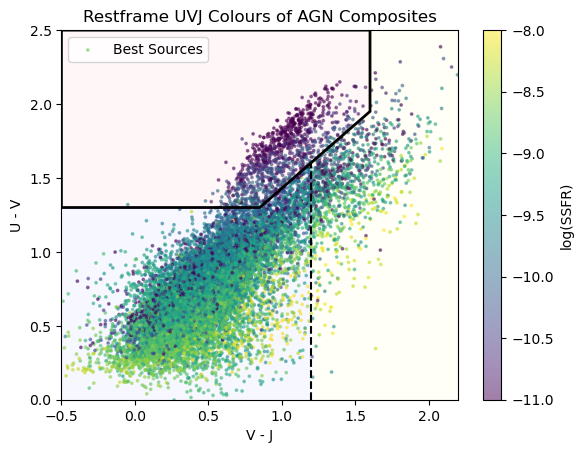

In [174]:
# In doing this we continue and keep the sources here
# Plotting again with a lssfr overlay for each to see if it iin the same general type of spots
# do subplotting to see these graphs side by side

# Create 2 plots, plotting the UVJ diagram for the best sources with inital colours and not inital colours
plt.scatter(best_sources_df['VJ_0'], best_sources_df['UV_0'], c=best_sources_df['lssfr'], cmap='viridis', s=3, alpha=0.5, label='Best Sources')

# limit the colourbar between -8 and -11
plt.colorbar(label='log(SSFR)')

# limit cbar values
plt.clim(-11, -8)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()


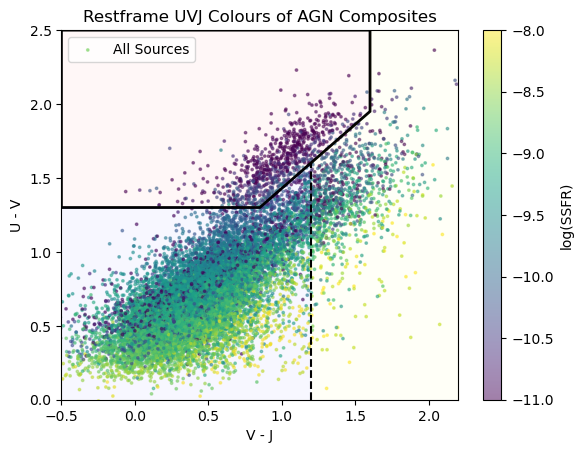

In [175]:


plt.scatter(best_sources_df['VJ'], best_sources_df['UV'], c=best_sources_df['lssfr'], cmap='viridis', s=3, alpha=0.5, label='All Sources')

# limit the colourbar between -8 and -11
plt.colorbar(label='log(SSFR)')

# limit cbar values
plt.clim(-11, -8)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
# for i in range(len(selected_ids_df)):
#     #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
#     plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()

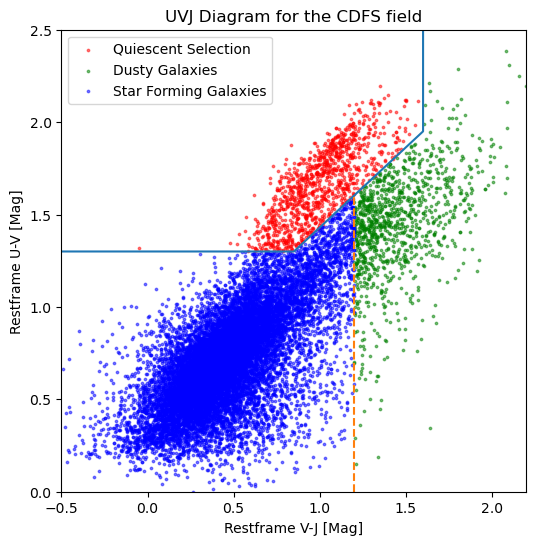

In [195]:
# We now want to look at this distribution, and make a informed selection on each region, recalling that we have actually used the previous code to classify the galaxy type based on UVJ
# we extend this by actually looking at UV_0 and VJ_0

best_sources_df = categorise_uvj(best_sources_df, best_sources_df['VJ_0'], best_sources_df['UV_0'], 0)

We note the expected output, with the UVJ diagram looking much as intended aside from a rather large amount of scatter missing at extreme values of VJ/UV

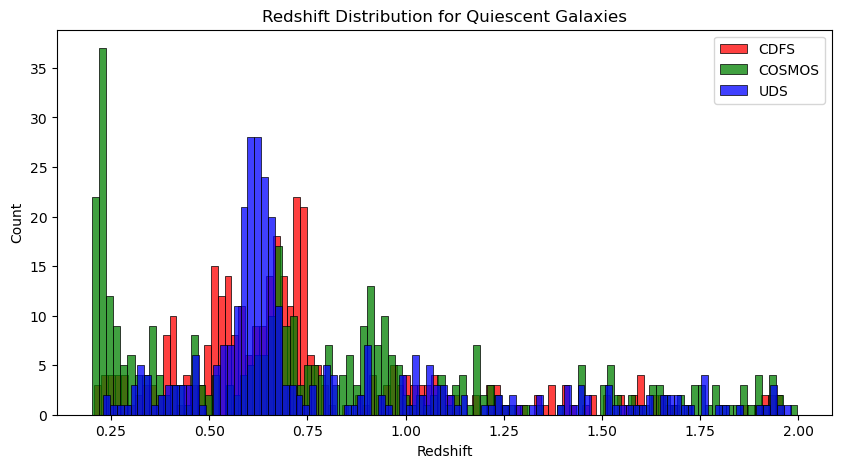

In [200]:
# Using this we may select a quiescent selection from each of the three fields. For completeness we may also select a dusty, and star formaing selection from each of the three fields. Evenetually we will out some id's to see how this evolves the colour space.
# for each of the 3 populations, plot the redshift distributions

# Quiescent: plotting all fields on one histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
#sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0)]['zpk'], bins=100, color='blue', ax=ax, label='All Fields')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0) & (best_sources_df['field'] == 'CDFS')]['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0) & (best_sources_df['field'] == 'COSMOS')]['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 0) & (best_sources_df['field'] == 'UDS')]['zpk'], bins=100, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Quiescent Galaxies')
plt.legend()
plt.show()



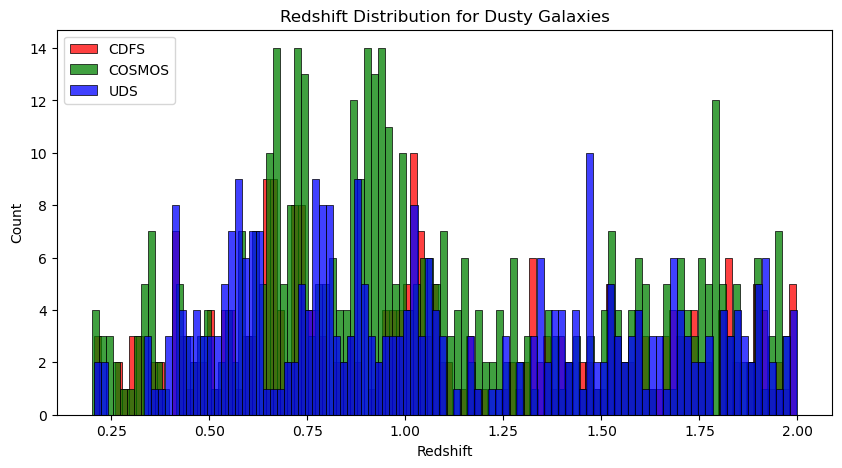

In [201]:
# Dusty: plotting all fields on one histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
#sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2)]['zpk'], bins=100, color='blue', ax=ax, label='All Fields')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2) & (best_sources_df['field'] == 'CDFS')]['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2) & (best_sources_df['field'] == 'COSMOS')]['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 2) & (best_sources_df['field'] == 'UDS')]['zpk'], bins=100, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Dusty Galaxies')
plt.legend()
plt.show()

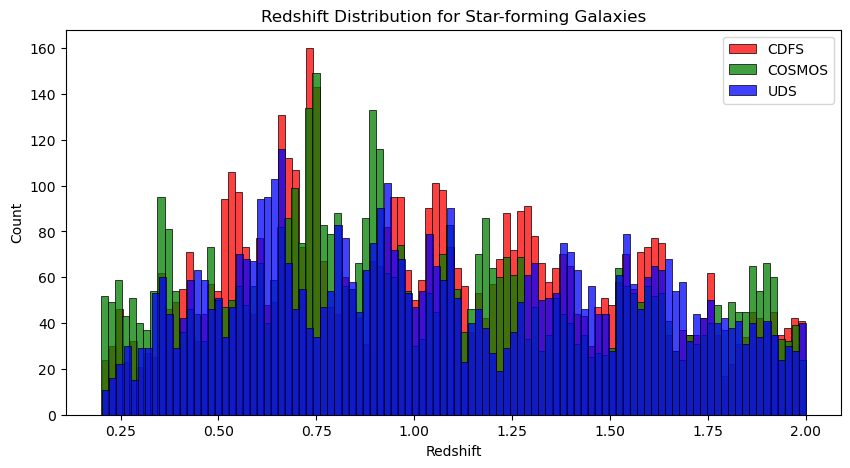

In [202]:
# Finally for starforming
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot a histogram for each field: UDS, COSMOS, CDFS
#sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1)]['zpk'], bins=100, color='blue', ax=ax, label='All Fields')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1) & (best_sources_df['field'] == 'CDFS')]['zpk'], bins=100, color='red', ax=ax, label='CDFS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1) & (best_sources_df['field'] == 'COSMOS')]['zpk'], bins=100, color='green', ax=ax, label='COSMOS')
sns.histplot(best_sources_df[(best_sources_df['GalaxyType_0'] == 1) & (best_sources_df['field'] == 'UDS')]['zpk'], bins=100, color='blue', ax=ax, label='UDS')
ax.set_xlabel('Redshift')
ax.set_ylabel('Count')
ax.set_title('Redshift Distribution for Star-forming Galaxies')
plt.legend()
plt.show()

In [ ]:
# Now we have an idea of redshift distribution we can look at finidng some good galaxies to investigate